- k값을 아는게 제일 중요함!
- 이걸 찾는 방법이 있음~!
- Train data(전체 80% 안에서)로 교차검증도 할꺼야(전체 데이터가 많지 않을때 4fold 로 train과 test를 번갈아가면서 검증해보는것)

# KNN으로 포지션 예측하기

In [1]:
# Random값을 정하기
import numpy as np
np.random.seed(5)

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("../Data/basketball_train.csv")
test = pd.read_csv("../Data/basketball_test.csv")
train.head()

,Player,Pos,3P,TRB,BLK
0,Myles Turner,C,0.5,7.3,2.1
1,Marreese Speights,C,1.3,4.5,0.5
2,Kentavious Caldwell-Pope,SG,2.0,3.3,0.2
3,J.J. Redick,SG,2.6,2.2,0.2
4,Al Horford,C,1.3,6.8,1.3


In [4]:
test.head()

,Player,Pos,3P,TRB,BLK
0,Marcus Smart,SG,1.2,3.9,0.4
1,C.J. McCollum,SG,2.3,3.6,0.5
2,Robin Lopez,C,0.0,6.4,1.4
3,Evan Fournier,SG,1.9,3.1,0.1
4,Iman Shumpert,SG,1.2,2.9,0.4


In [5]:
print(train.shape)
print(train.count())
print(train.isna().sum())

(80, 5)
Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [6]:
print(test.shape)
print(test.count())
print(test.isna().sum())

(20, 5)
Player    20
Pos       20
3P        20
TRB       20
BLK       20
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


### 최적의 k 찾기  (교차검증 - cross validation)
- 머신러닝하면서 교차검증을 안했다면 사기치는거임

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증 해주는 모듈

In [8]:
# 최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정.
# // 몫
max_k_range = train.shape[0] // 2 # 반 //train.shape는 튜플
max_k_range

40

In [9]:
# 최적의 k를 찾기 위한 범위 확인
k_list = []
# 3번부터  max_k_range까지 2개씩 증가
for i in range(3, max_k_range, 2):
    k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [10]:
# 점수 저장및 Train Data의 정의
cross_validation_scores = []
X_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

print(X_train.head())
print(y_train.head())

    3P  BLK  TRB
0  0.5  2.1  7.3
1  1.3  0.5  4.5
2  2.0  0.2  3.3
3  2.6  0.2  2.2
4  1.3  1.3  6.8
0     C
1     C
2    SG
3    SG
4     C
Name: Pos, dtype: object


---
> 교차검증안쓴 머신러닝은 가짜임   
> Y? 데이터 수가 적어서  
> 이거 잘써야함.  

In [11]:
# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장.
# K값 찾는 소스는 거의 변하지 않음. good

for k in k_list:
    # print(k)
    knn = KNeighborsClassifier(n_neighbors = k ) #n_neighbors = Hyper parameter 수를 정해줄수 있어
    scores = cross_val_score(
        # 교차검증 할 모델은 뭐야?
        knn,
        # 데이터는 뭐야?
        X_train,
        y_train,
        # cross validation(교차검증 횟수) 나는 10번 할꺼야
        cv=10,
        #정확도를 출력하고
        scoring='accuracy'
    )
    cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.925,
 0.9,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.9125,
 0.9,
 0.9,
 0.8875,
 0.8625,
 0.8375,
 0.825,
 0.825,
 0.8125,
 0.8125]

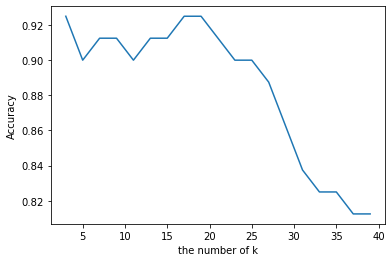

In [12]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

plt.plot(k_list, cross_validation_scores)
plt.xlabel("the number of k")
plt.ylabel("Accuracy")
plt.show()

In [13]:
# 가장 예측률이 높은 k를 선정하자
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k is : ",k)

The best number of k is :  3


---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=k)

In [16]:
# 학습에 사용할 features
X_train = train[['3P','BLK']]

In [17]:
# 학습에 사용할 target
y_train = train['Pos']

In [18]:
# 학습시키기
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# 검증에 사용할 features
x_test = test[['3P',"BLK"]]

In [20]:
# 검증의 정답
y_test = test['Pos']

In [21]:
# 정확도
knn.score(x_test, y_test)

0.95

In [22]:
#예측
pred = knn.predict(x_test)
pred

array(['SG', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C',
       'SG', 'C', 'C', 'C', 'SG', 'C', 'C', 'SG'], dtype=object)

In [23]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {
        '예측값':pred,
        "정답":y_test
        }
)
comparison.head()

,예측값,정답
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG


### Confusion matrix 시각화

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test, pred)
print(confusion_matrix1)
target_name = ["C","SG"]

[[10  1]
 [ 0  9]]


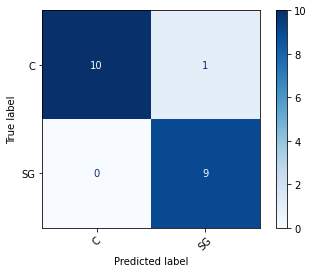

In [25]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)
disp.plot(
    cmap = plt.cm.Blues,
    xticks_rotation=45
)
plt.show()

--- 
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [26]:
# 학습에 사용할 features
X_train = train[['3P','BLK','TRB']]
# 학습에 사용할 target
y_train = train['Pos']

In [27]:
# 학습시키기
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# 검증에 사용할 features
x_test = test[['3P','BLK','TRB']]
# 학습에 사용할 feature
y_test = test['Pos']

In [29]:
# 정확도
knn.score(x_test, y_test)

0.95

In [30]:
#예측
pred = knn.predict(x_test)
pred

array(['SG', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C',
       'SG', 'C', 'C', 'C', 'SG', 'C', 'C', 'SG'], dtype=object)

In [31]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {
        '예측값':pred,
        "정답":y_test
        }
)
comparison.head()

,예측값,정답
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG


[[10  1]
 [ 0  9]]


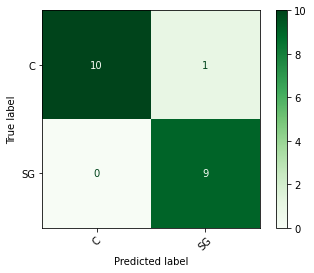

In [32]:
confusion_matrix1 = confusion_matrix(y_test, pred)
print(confusion_matrix1)
target_name = ["C","SG"]

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)
disp.plot(
    cmap = plt.cm.Greens,
    xticks_rotation=45
)
plt.show()

3P : 3.4
BLK : 0.5
TRB : 3.7
의 포지션

In [33]:
x_test.head()

,3P,BLK,TRB
0,1.2,0.4,3.9
1,2.3,0.5,3.6
2,0.0,1.4,6.4
3,1.9,0.1,3.1
4,1.2,0.4,2.9


In [34]:
knn.predict([[3.4,0.5,3.7]])

array(['SG'], dtype=object)